In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import json
import requests
import datetime

In [2]:
# Carregando os dados

df_retail = pd.read_excel(r'C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_brutos\australia_retail.xlsx')
display(df_retail)

,Type of Business,Business Name,Location,Opening Time,Closing Time,Most Traffic Occurring Time,Maximum Sales Time,Employee Scheduling,Maximum Sales Time.1,Daily Average Sales,Weekly Average Sales,Popular Products Sold,Customer Demographics,Payment Methods,Customer Satisfaction,Store Profitability,Employee Satisfaction,Labour Law Complaints
0,Clothing,Fashion Hub,Melbourne,09:00:00,20:00:00,19:00:00,16:00:00,Overstaffed,20:00:00,3520.77,23527.26,"T-shirts, Jeans",Young Adults,Credit Card,Good,Decreased,Dissatisfied,Yes
1,Bookstore,Book Nook,Brisbane,09:00:00,22:00:00,14:00:00,18:00:00,Understaffed,17:00:00,2915.36,27744.20,"Children's Books, Non-fiction",Teens,Credit Card,Good,Decreased,Dissatisfied,Yes
2,Bookstore,Book Nook,Adelaide,08:00:00,21:00:00,16:00:00,19:00:00,Overstaffed,18:00:00,1984.46,22411.88,"Non-fiction, Children's Books",Teens,Credit Card,Bad,Decreased,Satisfied,No
3,Bookstore,Book Nook,Melbourne,09:00:00,18:00:00,18:00:00,19:00:00,Overstaffed,19:00:00,644.22,31314.84,"Fiction, Non-fiction",Teens,Digital Wallet,Bad,Decreased,Dissatisfied,Yes
4,Furniture,Home Essentials,Sydney,07:00:00,20:00:00,15:00:00,21:00:00,Understaffed,18:00:00,620.63,27881.23,"Chairs, Sofas",Seniors,Cash,Good,Increased,Satisfied,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Clothing,Fashion Hub,Melbourne,07:00:00,20:00:00,18:00:00,17:00:00,Overstaffed,20:00:00,507.56,5081.61,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Satisfied,No
496,Grocery,Green Grocers,Sydney,08:00:00,18:00:00,11:00:00,17:00:00,Understaffed,17:00:00,3618.03,29709.42,"Vegetables, Dairy Products",Families,Debit Card,Bad,Increased,Satisfied,Yes
497,Clothing,Fashion Hub,Perth,07:00:00,21:00:00,12:00:00,20:00:00,Overstaffed,20:00:00,1569.51,9908.53,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Dissatisfied,No
498,Clothing,Fashion Hub,Sydney,08:00:00,19:00:00,20:00:00,17:00:00,Understaffed,19:00:00,1411.71,33851.77,"T-shirts, Jeans",Young Adults,Credit Card,Good,Increased,Dissatisfied,Yes


In [3]:
# Tipo do objeto
print(type(df_retail))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# Tamanho do df_retail
df_retail.shape

(500, 18)

In [5]:
# Traduzindo os nomes das colunas para o português
df_retail = df_retail.rename(columns={
    "Type of Business": "tipo_negocio",
    "Business Name": "loja_negocio",
    "Location": "localidade",
    "Opening Time": "horario_abertura",
    "Closing Time": "horario_fechamento",
    "Most Traffic Occurring Time": "horario_maior_fluxo",
    "Maximum Sales Time": "horario_pico_vendas",
    "Maximum Sales Time.1": "horario_pico_vendas_2",
    "Employee Scheduling": "alocacao_funcionarios",
    "Employee Satisfaction": "satisfacao_funcionarios",
    "Daily Average Sales": "vendas_medias_diarias",
    "Weekly Average Sales": "vendas_medias_semanais",
    "Store Profitability": "lucratividade_loja",
    "Popular Products Sold": "produtos_populares",
    "Customer Demographics": "perfil_clientes",
    "Payment Methods": "metodos_pagamento",
    "Customer Satisfaction": "satisfacao_clientes",
    "Labour Law Complaints": "reclamacoes_trabalhistas"
})

# Mostrar as novas colunas
df_retail.head()

,tipo_negocio,loja_negocio,localidade,horario_abertura,horario_fechamento,horario_maior_fluxo,horario_pico_vendas,alocacao_funcionarios,horario_pico_vendas_2,vendas_medias_diarias,vendas_medias_semanais,produtos_populares,perfil_clientes,metodos_pagamento,satisfacao_clientes,lucratividade_loja,satisfacao_funcionarios,reclamacoes_trabalhistas
0,Clothing,Fashion Hub,Melbourne,09:00:00,20:00:00,19:00:00,16:00:00,Overstaffed,20:00:00,3520.77,23527.26,"T-shirts, Jeans",Young Adults,Credit Card,Good,Decreased,Dissatisfied,Yes
1,Bookstore,Book Nook,Brisbane,09:00:00,22:00:00,14:00:00,18:00:00,Understaffed,17:00:00,2915.36,27744.20,"Children's Books, Non-fiction",Teens,Credit Card,Good,Decreased,Dissatisfied,Yes
2,Bookstore,Book Nook,Adelaide,08:00:00,21:00:00,16:00:00,19:00:00,Overstaffed,18:00:00,1984.46,22411.88,"Non-fiction, Children's Books",Teens,Credit Card,Bad,Decreased,Satisfied,No
3,Bookstore,Book Nook,Melbourne,09:00:00,18:00:00,18:00:00,19:00:00,Overstaffed,19:00:00,644.22,31314.84,"Fiction, Non-fiction",Teens,Digital Wallet,Bad,Decreased,Dissatisfied,Yes
4,Furniture,Home Essentials,Sydney,07:00:00,20:00:00,15:00:00,21:00:00,Understaffed,18:00:00,620.63,27881.23,"Chairs, Sofas",Seniors,Cash,Good,Increased,Satisfied,No


In [6]:
# Informações gerais sobre o df
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tipo_negocio              500 non-null    object 
 1   loja_negocio              500 non-null    object 
 2   localidade                500 non-null    object 
 3   horario_abertura          500 non-null    object 
 4   horario_fechamento        500 non-null    object 
 5   horario_maior_fluxo       500 non-null    object 
 6   horario_pico_vendas       500 non-null    object 
 7   alocacao_funcionarios     500 non-null    object 
 8   horario_pico_vendas_2     500 non-null    object 
 9   vendas_medias_diarias     500 non-null    float64
 10  vendas_medias_semanais    500 non-null    float64
 11  produtos_populares        500 non-null    object 
 12  perfil_clientes           500 non-null    object 
 13  metodos_pagamento         500 non-null    object 
 14  satisfacao

In [7]:
# Estatísticas gerais
df_retail.describe()

,vendas_medias_diarias,vendas_medias_semanais
count,500.000000,500.000000
mean,2748.050040,21274.825640
std,1163.109471,9397.319614
min,494.540000,3865.030000
25%,1868.622500,13966.630000
50%,2785.035000,23320.345000
75%,3698.420000,29865.052500
max,5199.460000,37754.760000


In [8]:
# Verificando valores nulos
df_retail.isnull().sum()

tipo_negocio                0
loja_negocio                0
localidade                  0
horario_abertura            0
horario_fechamento          0
horario_maior_fluxo         0
horario_pico_vendas         0
alocacao_funcionarios       0
horario_pico_vendas_2       0
vendas_medias_diarias       0
vendas_medias_semanais      0
produtos_populares          0
perfil_clientes             0
metodos_pagamento           0
satisfacao_clientes         0
lucratividade_loja          0
satisfacao_funcionarios     0
reclamacoes_trabalhistas    0
dtype: int64

In [9]:
maior_media_loja = df_retail[['loja_negocio', 'vendas_medias_diarias']].groupby('loja_negocio').sum()
display(maior_media_loja.sort_values(by='vendas_medias_diarias', ascending=False))

,vendas_medias_diarias
loja_negocio,
Fashion Hub,400995.38
Tech Store,349798.45
Home Essentials,258493.82
Book Nook,247030.49
Green Grocers,117706.88


In [10]:
media_vendas_localidade = df_retail.groupby(['localidade'])['vendas_medias_diarias'].mean().round(2).reset_index()
display(round(media_vendas_localidade.sort_values(by='vendas_medias_diarias', ascending=False)),2)

,localidade,vendas_medias_diarias
4,Sydney,3068.0
1,Brisbane,2898.0
2,Melbourne,2687.0
0,Adelaide,2506.0
3,Perth,2460.0


2

In [11]:
max_vendas_localidade = df_retail.groupby(['localidade'])['vendas_medias_diarias'].max().round(2).reset_index()
display(max_vendas_localidade.sort_values(by='vendas_medias_diarias', ascending=False))

,localidade,vendas_medias_diarias
4,Sydney,5199.46
2,Melbourne,5103.27
1,Brisbane,4957.99
0,Adelaide,4574.39
3,Perth,4093.49


In [12]:
min_vendas_localidade = df_retail.groupby(['localidade'])['vendas_medias_diarias'].min().round(2).reset_index()
display(min_vendas_localidade.sort_values(by='vendas_medias_diarias', ascending=False))

,localidade,vendas_medias_diarias
3,Perth,1401.10
1,Brisbane,885.57
0,Adelaide,753.05
4,Sydney,595.51
2,Melbourne,494.54


In [13]:
# Juntando as vendas medias diarias por localidade
df_vendas_localidade = (media_vendas_localidade.merge(min_vendas_localidade, on='localidade', suffixes=('_media', '_min'))).merge(max_vendas_localidade, on='localidade').rename(columns={'vendas_medias_diarias': 'vendas_medias_diarias_max'})
df_vendas_localidade = df_vendas_localidade.sort_values(by='vendas_medias_diarias_media', ascending=False)
display(df_vendas_localidade)

,localidade,vendas_medias_diarias_media,vendas_medias_diarias_min,vendas_medias_diarias_max
4,Sydney,3068.43,595.51,5199.46
1,Brisbane,2898.42,885.57,4957.99
2,Melbourne,2687.14,494.54,5103.27
0,Adelaide,2505.73,753.05,4574.39
3,Perth,2459.98,1401.10,4093.49


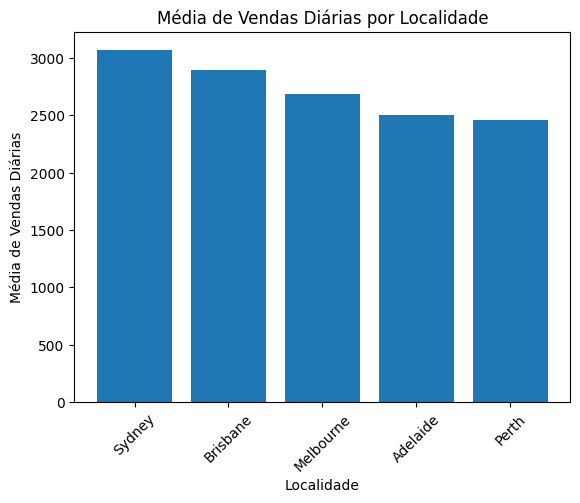

In [14]:
# Gráfico de barras da média de vendas diárias por localidade

plt.figure()
plt.bar(df_vendas_localidade['localidade'], df_vendas_localidade['vendas_medias_diarias_media'])
plt.xlabel('Localidade')
plt.ylabel('Média de Vendas Diárias')
plt.title('Média de Vendas Diárias por Localidade')
plt.xticks(rotation=45)
plt.show()

A cidade mais forte em vendas, em média, é Sidney

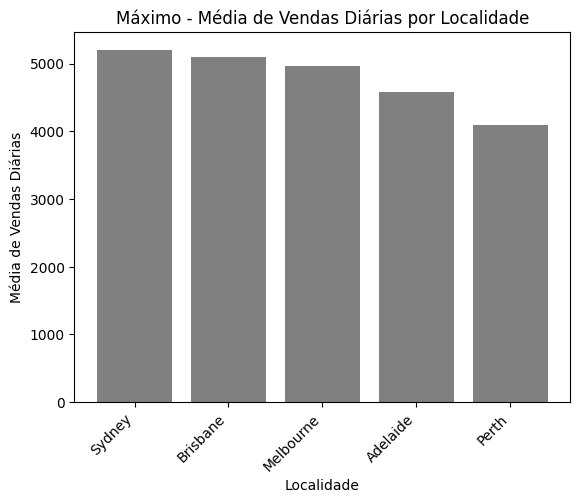

In [15]:
# Gráfico de barras do máximo de vendas diárias por localidade

plt.figure()
plt.bar(df_vendas_localidade['localidade'], df_vendas_localidade['vendas_medias_diarias_max'].sort_values(ascending=False),
        color='gray')
plt.xlabel('Localidade')
plt.ylabel('Média de Vendas Diárias')
plt.title('Máximo - Média de Vendas Diárias por Localidade')
plt.xticks(rotation=45, ha='right')
plt.show()

A cidade com maior potencial de vendas, é Sidney, seguida por Brisbane, pelo raciocínio de máximo

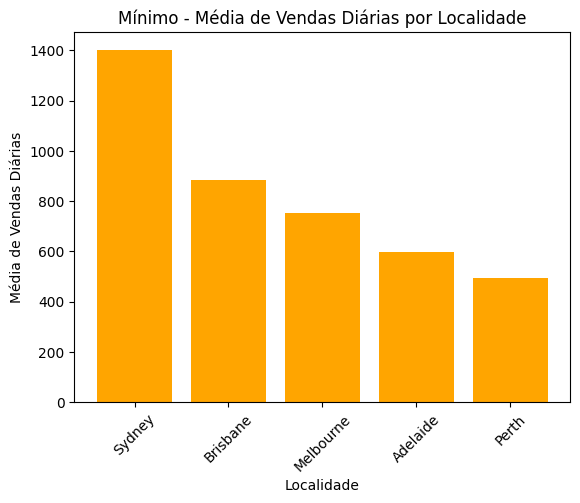

In [16]:
# Gráfico de barras do mínimo de vendas diárias por localidade

plt.figure()
plt.bar(df_vendas_localidade['localidade'], df_vendas_localidade['vendas_medias_diarias_min'].sort_values(ascending=False),
        color='orange')
plt.xlabel('Localidade')
plt.ylabel('Média de Vendas Diárias')
plt.title('Mínimo - Média de Vendas Diárias por Localidade')
plt.xticks(rotation=45)
plt.show()

A cidade com menor potencial, é Perth, baseado no mínimo de média de vendas diárias por localidade.

In [17]:
df_vendas_localidade['amplitude'] = df_vendas_localidade['vendas_medias_diarias_max'] - df_vendas_localidade['vendas_medias_diarias_min']
display(round(df_vendas_localidade),2)

,localidade,vendas_medias_diarias_media,vendas_medias_diarias_min,vendas_medias_diarias_max,amplitude
4,Sydney,3068.0,596.0,5199.0,4604.0
1,Brisbane,2898.0,886.0,4958.0,4072.0
2,Melbourne,2687.0,495.0,5103.0,4609.0
0,Adelaide,2506.0,753.0,4574.0,3821.0
3,Perth,2460.0,1401.0,4093.0,2692.0


2

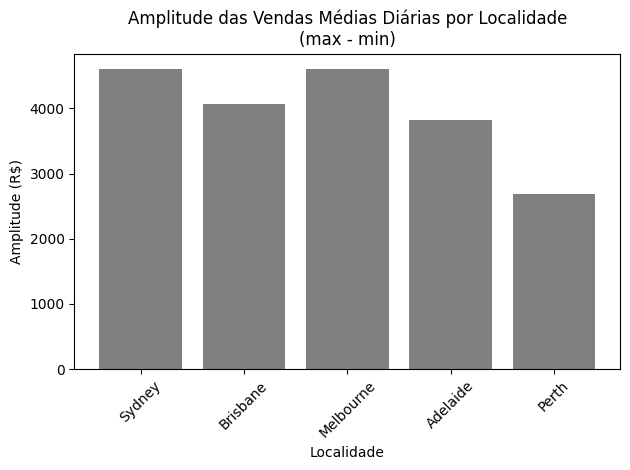

In [18]:
# Gráfico de barras - amplitude de vendas diárias por localidade

plt.figure()
plt.bar(df_vendas_localidade['localidade'], df_vendas_localidade['amplitude'], 
        color='gray')
plt.title('Amplitude das Vendas Médias Diárias por Localidade\n(max - min)')
plt.xlabel('Localidade')
plt.ylabel('Amplitude (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sydney e Melbourne apresentam as maiores amplitudes de vendas diárias, o que mostra que tem maior equilíbrio.

Brisbane também tem uma ampliture alta, mas menor que Sydney e Melbourne.

Adelaide tem uma amplitude intermediária.

Perth tem uma menor amplitude, é mais estável.

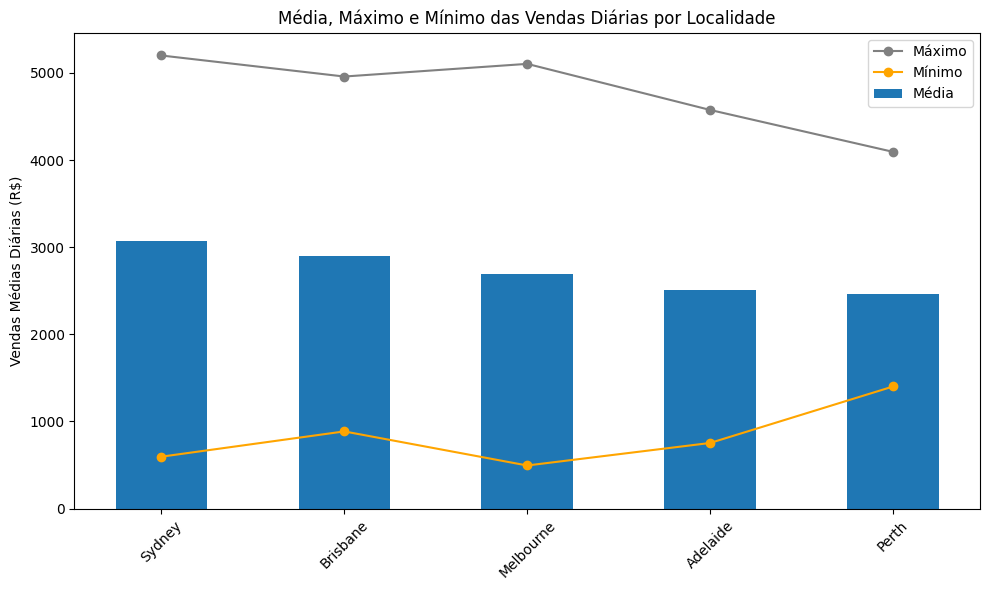

In [19]:
df_plot = df_vendas_localidade.sort_values(
    by='vendas_medias_diarias_media',
    ascending=False
)

x = np.arange(len(df_plot))

med = df_plot['vendas_medias_diarias_media']
minv = df_plot['vendas_medias_diarias_min']
maxv = df_plot['vendas_medias_diarias_max']

plt.figure(figsize=(10, 6))

# Barras da média
plt.bar(x, med, width=0.5, label='Média')

# Linha do máximo
plt.plot(x, maxv, marker='o', label='Máximo', color='gray')

# Linha do mínimo
plt.plot(x, minv, marker='o', label='Mínimo', color='orange')

plt.xticks(x, df_plot['localidade'], rotation=45)
plt.ylabel('Vendas Médias Diárias (R$)')
plt.title('Média, Máximo e Mínimo das Vendas Diárias por Localidade')
plt.legend()
plt.tight_layout()
plt.show()

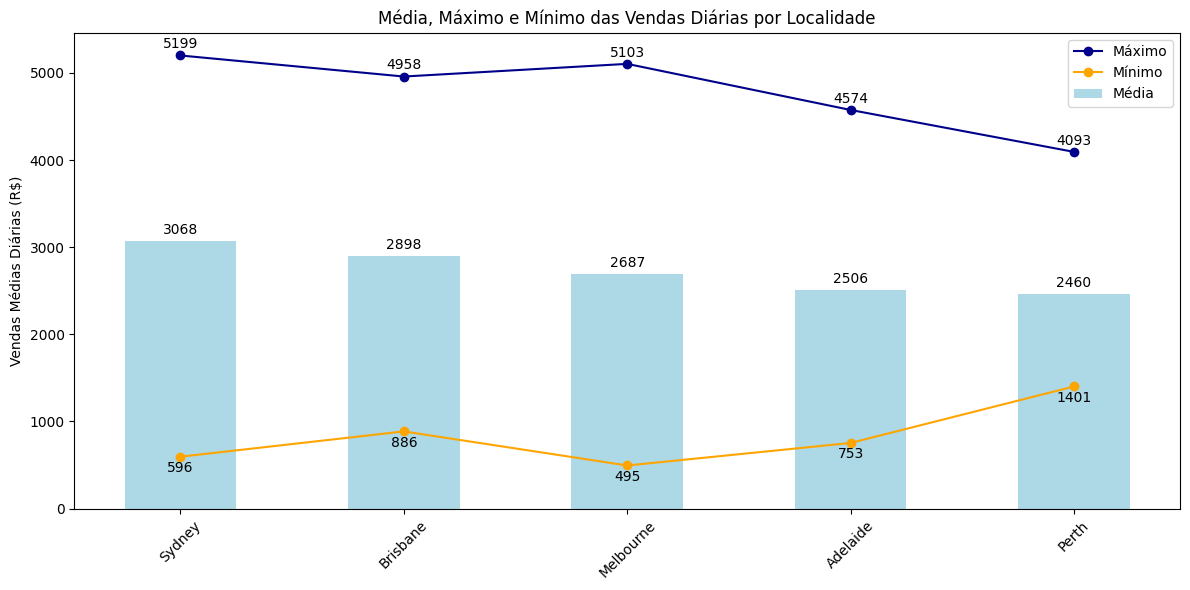

In [20]:
# Média, Máximo e Mínimo das Vendas Diárias por Localidade

# Ordenar o dataframe pela média
df_plot = df_vendas_localidade.sort_values(
    by='vendas_medias_diarias_media',
    ascending=False
)

x = np.arange(len(df_plot))

med = df_plot['vendas_medias_diarias_media']
minv = df_plot['vendas_medias_diarias_min']
maxv = df_plot['vendas_medias_diarias_max']

plt.figure(figsize=(12, 6))

# Barras (média)
plt.bar(x, med, width=0.5, label='Média', color='lightblue')

# Linha do máximo
plt.plot(x, maxv, marker='o', label='Máximo', color='darkblue')

# Linha do mínimo
plt.plot(x, minv, marker='o', label='Mínimo', color='orange')

# Anotação dos valores em cada ponto da linha de MÁXIMO
for i, v in enumerate(maxv):
    plt.text(i, v + 50,                
             f'{v:.0f}',               
             ha='center', va='bottom')

# Anotação dos valores em cada ponto da linha de MÍNIMO
for i, v in enumerate(minv):
    plt.text(i, v - 50,                
             f'{v:.0f}',
             ha='center', va='top')

# Anotação dos valores da MÉDIA (em cima da barra)
for i, v in enumerate(med):
    plt.text(i, v + 50,
             f'{v:.0f}',
             ha='center', va='bottom')

plt.xticks(x, df_plot['localidade'], rotation=45)
plt.ylabel('Vendas Médias Diárias (R$)')
plt.title('Média, Máximo e Mínimo das Vendas Diárias por Localidade')
plt.legend()
plt.tight_layout()
plt.show()

### Média de Vendas Semanais

In [21]:
df_retail

,tipo_negocio,loja_negocio,localidade,horario_abertura,horario_fechamento,horario_maior_fluxo,horario_pico_vendas,alocacao_funcionarios,horario_pico_vendas_2,vendas_medias_diarias,vendas_medias_semanais,produtos_populares,perfil_clientes,metodos_pagamento,satisfacao_clientes,lucratividade_loja,satisfacao_funcionarios,reclamacoes_trabalhistas
0,Clothing,Fashion Hub,Melbourne,09:00:00,20:00:00,19:00:00,16:00:00,Overstaffed,20:00:00,3520.77,23527.26,"T-shirts, Jeans",Young Adults,Credit Card,Good,Decreased,Dissatisfied,Yes
1,Bookstore,Book Nook,Brisbane,09:00:00,22:00:00,14:00:00,18:00:00,Understaffed,17:00:00,2915.36,27744.20,"Children's Books, Non-fiction",Teens,Credit Card,Good,Decreased,Dissatisfied,Yes
2,Bookstore,Book Nook,Adelaide,08:00:00,21:00:00,16:00:00,19:00:00,Overstaffed,18:00:00,1984.46,22411.88,"Non-fiction, Children's Books",Teens,Credit Card,Bad,Decreased,Satisfied,No
3,Bookstore,Book Nook,Melbourne,09:00:00,18:00:00,18:00:00,19:00:00,Overstaffed,19:00:00,644.22,31314.84,"Fiction, Non-fiction",Teens,Digital Wallet,Bad,Decreased,Dissatisfied,Yes
4,Furniture,Home Essentials,Sydney,07:00:00,20:00:00,15:00:00,21:00:00,Understaffed,18:00:00,620.63,27881.23,"Chairs, Sofas",Seniors,Cash,Good,Increased,Satisfied,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Clothing,Fashion Hub,Melbourne,07:00:00,20:00:00,18:00:00,17:00:00,Overstaffed,20:00:00,507.56,5081.61,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Satisfied,No
496,Grocery,Green Grocers,Sydney,08:00:00,18:00:00,11:00:00,17:00:00,Understaffed,17:00:00,3618.03,29709.42,"Vegetables, Dairy Products",Families,Debit Card,Bad,Increased,Satisfied,Yes
497,Clothing,Fashion Hub,Perth,07:00:00,21:00:00,12:00:00,20:00:00,Overstaffed,20:00:00,1569.51,9908.53,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Dissatisfied,No
498,Clothing,Fashion Hub,Sydney,08:00:00,19:00:00,20:00:00,17:00:00,Understaffed,19:00:00,1411.71,33851.77,"T-shirts, Jeans",Young Adults,Credit Card,Good,Increased,Dissatisfied,Yes


In [22]:
maior_media_loja_semanais = df_retail[['loja_negocio', 'vendas_medias_semanais']].groupby('loja_negocio').sum()
display(maior_media_loja_semanais.sort_values(by='vendas_medias_semanais', ascending=False))

,vendas_medias_semanais
loja_negocio,
Fashion Hub,3187928.51
Home Essentials,2493132.02
Book Nook,2192288.24
Tech Store,1713167.58
Green Grocers,1050896.47


In [23]:
media_vendas_localidade_semanais = df_retail.groupby(['localidade'])['vendas_medias_semanais'].mean().round(2).reset_index()
display(round(media_vendas_localidade_semanais.sort_values(by='vendas_medias_semanais', ascending=False)),2)

,localidade,vendas_medias_semanais
4,Sydney,25010.0
0,Adelaide,20658.0
3,Perth,20395.0
1,Brisbane,19804.0
2,Melbourne,18886.0


2

In [24]:
max_vendas_localidade_semanais = df_retail.groupby(['localidade'])['vendas_medias_semanais'].max().round(2).reset_index()
display(max_vendas_localidade_semanais.sort_values(by='vendas_medias_semanais', ascending=False))

,localidade,vendas_medias_semanais
0,Adelaide,37754.76
3,Perth,37462.60
4,Sydney,35041.76
2,Melbourne,35035.15
1,Brisbane,33477.96


In [25]:
min_vendas_localidade_semanais = df_retail.groupby(['localidade'])['vendas_medias_semanais'].min().round(2).reset_index()
display(min_vendas_localidade_semanais.sort_values(by='vendas_medias_semanais', ascending=False))

,localidade,vendas_medias_semanais
4,Sydney,13804.24
1,Brisbane,8958.45
2,Melbourne,4653.67
0,Adelaide,4393.05
3,Perth,3865.03


In [26]:
# Juntando as vendas medias diarias por localidade semanais
df_vendas_localidade_semanais = (media_vendas_localidade_semanais.merge(min_vendas_localidade_semanais,
                                                                      on='localidade', suffixes=('_media', '_min'))).merge(max_vendas_localidade_semanais, on='localidade').rename(columns={'vendas_medias_semanais': 'vendas_medias_semanais_max'})
df_vendas_localidade_semanais = df_vendas_localidade_semanais.sort_values(by='vendas_medias_semanais_media', ascending=False)
display(df_vendas_localidade_semanais)

,localidade,vendas_medias_semanais_media,vendas_medias_semanais_min,vendas_medias_semanais_max
4,Sydney,25010.26,13804.24,35041.76
0,Adelaide,20658.21,4393.05,37754.76
3,Perth,20394.89,3865.03,37462.60
1,Brisbane,19804.25,8958.45,33477.96
2,Melbourne,18885.58,4653.67,35035.15


In [27]:
df_vendas_localidade_semanais['amplitude'] = df_vendas_localidade_semanais['vendas_medias_semanais_max'] - df_vendas_localidade_semanais['vendas_medias_semanais_min']
display(round(df_vendas_localidade_semanais),2)

,localidade,vendas_medias_semanais_media,vendas_medias_semanais_min,vendas_medias_semanais_max,amplitude
4,Sydney,25010.0,13804.0,35042.0,21238.0
0,Adelaide,20658.0,4393.0,37755.0,33362.0
3,Perth,20395.0,3865.0,37463.0,33598.0
1,Brisbane,19804.0,8958.0,33478.0,24520.0
2,Melbourne,18886.0,4654.0,35035.0,30381.0


2

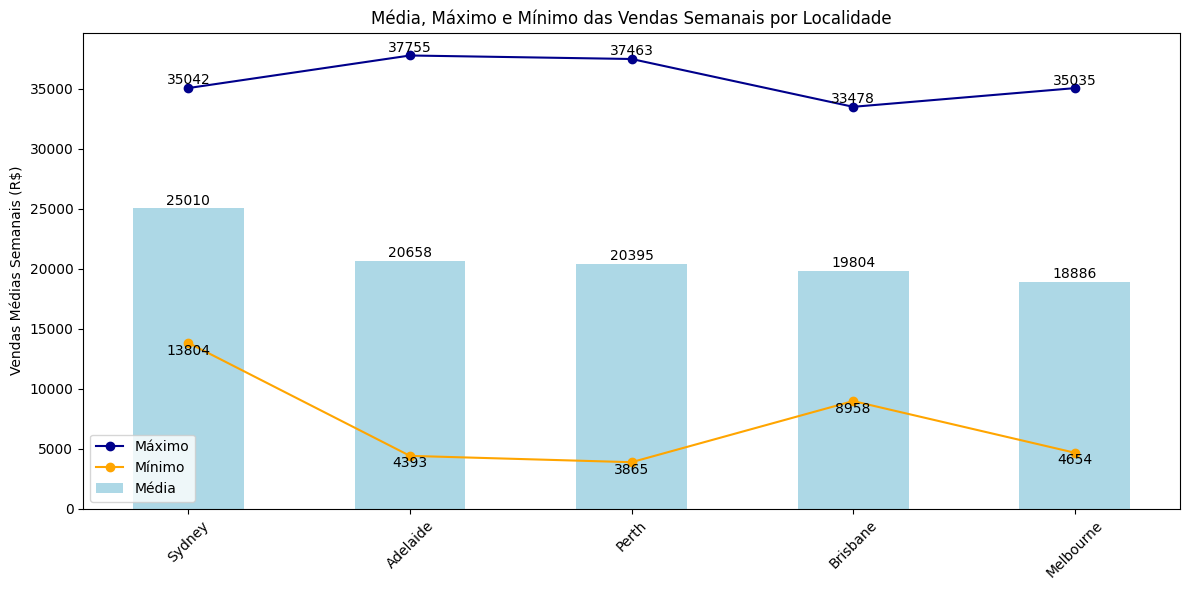

In [28]:
# Média, Máximo e Mínimo das Vendas Semanais por Localidade

# Ordenar o dataframe pela média
df_plot = df_vendas_localidade_semanais.sort_values(
    by='vendas_medias_semanais_media',
    ascending=False
)

x = np.arange(len(df_plot))

med = df_plot['vendas_medias_semanais_media']
minv = df_plot['vendas_medias_semanais_min']
maxv = df_plot['vendas_medias_semanais_max']

plt.figure(figsize=(12, 6))

# Barras (média)
plt.bar(x, med, width=0.5, label='Média', color='lightblue')

# Linha do máximo
plt.plot(x, maxv, marker='o', label='Máximo', color='darkblue')

# Linha do mínimo
plt.plot(x, minv, marker='o', label='Mínimo', color='orange')

# Anotação dos valores em cada ponto da linha de MÁXIMO
for i, v in enumerate(maxv):
    plt.text(i, v + 50,                
             f'{v:.0f}',               
             ha='center', va='bottom')

# Anotação dos valores em cada ponto da linha de MÍNIMO
for i, v in enumerate(minv):
    plt.text(i, v - 50,                
             f'{v:.0f}',
             ha='center', va='top')

# Anotação dos valores da MÉDIA (em cima da barra)
for i, v in enumerate(med):
    plt.text(i, v + 50,
             f'{v:.0f}',
             ha='center', va='bottom')

plt.xticks(x, df_plot['localidade'], rotation=45)
plt.ylabel('Vendas Médias Semanais (R$)')
plt.title('Média, Máximo e Mínimo das Vendas Semanais por Localidade')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
df_retail

,tipo_negocio,loja_negocio,localidade,horario_abertura,horario_fechamento,horario_maior_fluxo,horario_pico_vendas,alocacao_funcionarios,horario_pico_vendas_2,vendas_medias_diarias,vendas_medias_semanais,produtos_populares,perfil_clientes,metodos_pagamento,satisfacao_clientes,lucratividade_loja,satisfacao_funcionarios,reclamacoes_trabalhistas
0,Clothing,Fashion Hub,Melbourne,09:00:00,20:00:00,19:00:00,16:00:00,Overstaffed,20:00:00,3520.77,23527.26,"T-shirts, Jeans",Young Adults,Credit Card,Good,Decreased,Dissatisfied,Yes
1,Bookstore,Book Nook,Brisbane,09:00:00,22:00:00,14:00:00,18:00:00,Understaffed,17:00:00,2915.36,27744.20,"Children's Books, Non-fiction",Teens,Credit Card,Good,Decreased,Dissatisfied,Yes
2,Bookstore,Book Nook,Adelaide,08:00:00,21:00:00,16:00:00,19:00:00,Overstaffed,18:00:00,1984.46,22411.88,"Non-fiction, Children's Books",Teens,Credit Card,Bad,Decreased,Satisfied,No
3,Bookstore,Book Nook,Melbourne,09:00:00,18:00:00,18:00:00,19:00:00,Overstaffed,19:00:00,644.22,31314.84,"Fiction, Non-fiction",Teens,Digital Wallet,Bad,Decreased,Dissatisfied,Yes
4,Furniture,Home Essentials,Sydney,07:00:00,20:00:00,15:00:00,21:00:00,Understaffed,18:00:00,620.63,27881.23,"Chairs, Sofas",Seniors,Cash,Good,Increased,Satisfied,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Clothing,Fashion Hub,Melbourne,07:00:00,20:00:00,18:00:00,17:00:00,Overstaffed,20:00:00,507.56,5081.61,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Satisfied,No
496,Grocery,Green Grocers,Sydney,08:00:00,18:00:00,11:00:00,17:00:00,Understaffed,17:00:00,3618.03,29709.42,"Vegetables, Dairy Products",Families,Debit Card,Bad,Increased,Satisfied,Yes
497,Clothing,Fashion Hub,Perth,07:00:00,21:00:00,12:00:00,20:00:00,Overstaffed,20:00:00,1569.51,9908.53,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Dissatisfied,No
498,Clothing,Fashion Hub,Sydney,08:00:00,19:00:00,20:00:00,17:00:00,Understaffed,19:00:00,1411.71,33851.77,"T-shirts, Jeans",Young Adults,Credit Card,Good,Increased,Dissatisfied,Yes


In [30]:
### df_retail.to_excel(r'C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\australia_retail.xlsx')

In [31]:
display(df_retail)

,tipo_negocio,loja_negocio,localidade,horario_abertura,horario_fechamento,horario_maior_fluxo,horario_pico_vendas,alocacao_funcionarios,horario_pico_vendas_2,vendas_medias_diarias,vendas_medias_semanais,produtos_populares,perfil_clientes,metodos_pagamento,satisfacao_clientes,lucratividade_loja,satisfacao_funcionarios,reclamacoes_trabalhistas
0,Clothing,Fashion Hub,Melbourne,09:00:00,20:00:00,19:00:00,16:00:00,Overstaffed,20:00:00,3520.77,23527.26,"T-shirts, Jeans",Young Adults,Credit Card,Good,Decreased,Dissatisfied,Yes
1,Bookstore,Book Nook,Brisbane,09:00:00,22:00:00,14:00:00,18:00:00,Understaffed,17:00:00,2915.36,27744.20,"Children's Books, Non-fiction",Teens,Credit Card,Good,Decreased,Dissatisfied,Yes
2,Bookstore,Book Nook,Adelaide,08:00:00,21:00:00,16:00:00,19:00:00,Overstaffed,18:00:00,1984.46,22411.88,"Non-fiction, Children's Books",Teens,Credit Card,Bad,Decreased,Satisfied,No
3,Bookstore,Book Nook,Melbourne,09:00:00,18:00:00,18:00:00,19:00:00,Overstaffed,19:00:00,644.22,31314.84,"Fiction, Non-fiction",Teens,Digital Wallet,Bad,Decreased,Dissatisfied,Yes
4,Furniture,Home Essentials,Sydney,07:00:00,20:00:00,15:00:00,21:00:00,Understaffed,18:00:00,620.63,27881.23,"Chairs, Sofas",Seniors,Cash,Good,Increased,Satisfied,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Clothing,Fashion Hub,Melbourne,07:00:00,20:00:00,18:00:00,17:00:00,Overstaffed,20:00:00,507.56,5081.61,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Satisfied,No
496,Grocery,Green Grocers,Sydney,08:00:00,18:00:00,11:00:00,17:00:00,Understaffed,17:00:00,3618.03,29709.42,"Vegetables, Dairy Products",Families,Debit Card,Bad,Increased,Satisfied,Yes
497,Clothing,Fashion Hub,Perth,07:00:00,21:00:00,12:00:00,20:00:00,Overstaffed,20:00:00,1569.51,9908.53,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Dissatisfied,No
498,Clothing,Fashion Hub,Sydney,08:00:00,19:00:00,20:00:00,17:00:00,Understaffed,19:00:00,1411.71,33851.77,"T-shirts, Jeans",Young Adults,Credit Card,Good,Increased,Dissatisfied,Yes


In [32]:
df_retail.columns

Index(['tipo_negocio', 'loja_negocio', 'localidade', 'horario_abertura',
       'horario_fechamento', 'horario_maior_fluxo', 'horario_pico_vendas',
       'alocacao_funcionarios', 'horario_pico_vendas_2',
       'vendas_medias_diarias', 'vendas_medias_semanais', 'produtos_populares',
       'perfil_clientes', 'metodos_pagamento', 'satisfacao_clientes',
       'lucratividade_loja', 'satisfacao_funcionarios',
       'reclamacoes_trabalhistas'],
      dtype='object')

In [34]:
df_retail

,tipo_negocio,loja_negocio,localidade,horario_abertura,horario_fechamento,horario_maior_fluxo,horario_pico_vendas,alocacao_funcionarios,horario_pico_vendas_2,vendas_medias_diarias,vendas_medias_semanais,produtos_populares,perfil_clientes,metodos_pagamento,satisfacao_clientes,lucratividade_loja,satisfacao_funcionarios,reclamacoes_trabalhistas
0,Clothing,Fashion Hub,Melbourne,09:00:00,20:00:00,19:00:00,16:00:00,Overstaffed,20:00:00,3520.77,23527.26,"T-shirts, Jeans",Young Adults,Credit Card,Good,Decreased,Dissatisfied,Yes
1,Bookstore,Book Nook,Brisbane,09:00:00,22:00:00,14:00:00,18:00:00,Understaffed,17:00:00,2915.36,27744.20,"Children's Books, Non-fiction",Teens,Credit Card,Good,Decreased,Dissatisfied,Yes
2,Bookstore,Book Nook,Adelaide,08:00:00,21:00:00,16:00:00,19:00:00,Overstaffed,18:00:00,1984.46,22411.88,"Non-fiction, Children's Books",Teens,Credit Card,Bad,Decreased,Satisfied,No
3,Bookstore,Book Nook,Melbourne,09:00:00,18:00:00,18:00:00,19:00:00,Overstaffed,19:00:00,644.22,31314.84,"Fiction, Non-fiction",Teens,Digital Wallet,Bad,Decreased,Dissatisfied,Yes
4,Furniture,Home Essentials,Sydney,07:00:00,20:00:00,15:00:00,21:00:00,Understaffed,18:00:00,620.63,27881.23,"Chairs, Sofas",Seniors,Cash,Good,Increased,Satisfied,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Clothing,Fashion Hub,Melbourne,07:00:00,20:00:00,18:00:00,17:00:00,Overstaffed,20:00:00,507.56,5081.61,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Satisfied,No
496,Grocery,Green Grocers,Sydney,08:00:00,18:00:00,11:00:00,17:00:00,Understaffed,17:00:00,3618.03,29709.42,"Vegetables, Dairy Products",Families,Debit Card,Bad,Increased,Satisfied,Yes
497,Clothing,Fashion Hub,Perth,07:00:00,21:00:00,12:00:00,20:00:00,Overstaffed,20:00:00,1569.51,9908.53,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Dissatisfied,No
498,Clothing,Fashion Hub,Sydney,08:00:00,19:00:00,20:00:00,17:00:00,Understaffed,19:00:00,1411.71,33851.77,"T-shirts, Jeans",Young Adults,Credit Card,Good,Increased,Dissatisfied,Yes


In [35]:
"""colunas_hora = ['horario_abertura', 'horario_fechamento', 'horario_maior_fluxo', 'horario_pico_vendas', 'horario_pico_vendas_2']"""

"colunas_hora = ['horario_abertura', 'horario_fechamento', 'horario_maior_fluxo', 'horario_pico_vendas', 'horario_pico_vendas_2']"

In [36]:
"""for coluna in colunas_hora:
    df_retail[coluna] = pd.to_datetime(df_retail[coluna], errors='coerce')"""

"for coluna in colunas_hora:\n    df_retail[coluna] = pd.to_datetime(df_retail[coluna], errors='coerce')"

In [ ]:
"""df_retail[colunas_hora].dtypes"""

NameError: name 'colunas_hora' is not defined

In [ ]:
df_retail

,tipo_negocio,loja_negocio,localidade,horario_abertura,horario_fechamento,horario_maior_fluxo,horario_pico_vendas,alocacao_funcionarios,horario_pico_vendas_2,vendas_medias_diarias,vendas_medias_semanais,produtos_populares,perfil_clientes,metodos_pagamento,satisfacao_clientes,lucratividade_loja,satisfacao_funcionarios,reclamacoes_trabalhistas
0,Clothing,Fashion Hub,Melbourne,2025-12-08 09:00:00,2025-12-08 20:00:00,NaT,NaT,Overstaffed,2025-12-08 20:00:00,3520.77,23527.26,"T-shirts, Jeans",Young Adults,Credit Card,Good,Decreased,Dissatisfied,Yes
1,Bookstore,Book Nook,Brisbane,2025-12-08 09:00:00,2025-12-08 22:00:00,NaT,NaT,Understaffed,2025-12-08 17:00:00,2915.36,27744.20,"Children's Books, Non-fiction",Teens,Credit Card,Good,Decreased,Dissatisfied,Yes
2,Bookstore,Book Nook,Adelaide,2025-12-08 08:00:00,2025-12-08 21:00:00,NaT,NaT,Overstaffed,2025-12-08 18:00:00,1984.46,22411.88,"Non-fiction, Children's Books",Teens,Credit Card,Bad,Decreased,Satisfied,No
3,Bookstore,Book Nook,Melbourne,2025-12-08 09:00:00,2025-12-08 18:00:00,NaT,NaT,Overstaffed,2025-12-08 19:00:00,644.22,31314.84,"Fiction, Non-fiction",Teens,Digital Wallet,Bad,Decreased,Dissatisfied,Yes
4,Furniture,Home Essentials,Sydney,2025-12-08 07:00:00,2025-12-08 20:00:00,NaT,NaT,Understaffed,2025-12-08 18:00:00,620.63,27881.23,"Chairs, Sofas",Seniors,Cash,Good,Increased,Satisfied,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Clothing,Fashion Hub,Melbourne,2025-12-08 07:00:00,2025-12-08 20:00:00,NaT,NaT,Overstaffed,2025-12-08 20:00:00,507.56,5081.61,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Satisfied,No
496,Grocery,Green Grocers,Sydney,2025-12-08 08:00:00,2025-12-08 18:00:00,2025-12-08 11:00:00,NaT,Understaffed,2025-12-08 17:00:00,3618.03,29709.42,"Vegetables, Dairy Products",Families,Debit Card,Bad,Increased,Satisfied,Yes
497,Clothing,Fashion Hub,Perth,2025-12-08 07:00:00,2025-12-08 21:00:00,2025-12-08 12:00:00,NaT,Overstaffed,2025-12-08 20:00:00,1569.51,9908.53,"Dresses, Jeans",Young Adults,Digital Wallet,Good,Increased,Dissatisfied,No
498,Clothing,Fashion Hub,Sydney,2025-12-08 08:00:00,2025-12-08 19:00:00,NaT,NaT,Understaffed,2025-12-08 19:00:00,1411.71,33851.77,"T-shirts, Jeans",Young Adults,Credit Card,Good,Increased,Dissatisfied,Yes


In [ ]:
df_retail.isna().sum()

tipo_negocio                  0
loja_negocio                  0
localidade                    0
horario_abertura              0
horario_fechamento            0
horario_maior_fluxo         374
horario_pico_vendas         500
alocacao_funcionarios         0
horario_pico_vendas_2         0
vendas_medias_diarias         0
vendas_medias_semanais        0
produtos_populares            0
perfil_clientes               0
metodos_pagamento             0
satisfacao_clientes           0
lucratividade_loja            0
satisfacao_funcionarios       0
reclamacoes_trabalhistas      0
dtype: int64